# **Simula un proceso ergódico, calcula los promedios temporales y espaciales, y demuestra que el proceso es ergódico.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy.stats import norm

In [ ]:
#Descripción de parámetros de el proceso.

N = 1000 # número de puntos en el tiempo
M = 50 # realizaciones hechas
t = np.linspace(0, 1, N) #vector de 0 con pasos de 1 xq es discreto hasta N

mu = 0 #media cero
sigma = 1 #desviación estandar cero, todo esto para que sea de la forma dist. normal estandar
X = sigma * np.random.randn(M, N) + mu #Matriz de realizaciones (MxN)

In [ ]:
def prom_temp(N, M, mu, sigma): #Calcula el promedio temporal para cada realización
    # Inicializar lista para almacenar el promedio temporal de cada realización
    time_averages = []

    # Calcular el promedio temporal para cada realización
    for i in range(M):
        suma_temporal = 0
        for n in range(N):
            suma_temporal += X[i, n]
        promedio_temporal = suma_temporal / N
        time_averages.append(promedio_temporal)

    return time_averages

In [ ]:
def prom_ensamble(N, M, mu, sigma): #Calcula el promedio espacial en cada instante de tiempo del proceso

    # Inicializar lista para almacenar el promedio espacial en cada instante de tiempo
    ensemble_average = []

    # Calcular el promedio espacial para cada punto en el tiempo
    for n in range(N):
        suma_espacial = 0
        for i in range(M):
            suma_espacial += X[i, n]
        promedio_espacial = suma_espacial / M
        ensemble_average.append(promedio_espacial) #se va añadiendo a la lista el promedio calculado para ese i

    return ensemble_average

In [ ]:
def comprobacion_erg(N, M, mu, sigma): #Compara el promedio temporal promedio y el promedio espacial promedio para verificar si el proceso es ergódico.

    time_averages = prom_temp(N, M, mu, sigma)# promedio temporal de cada realización
    ensemble_average = prom_ensamble(N, M, mu, sigma) # promedio espacial en cada instante

    # Calcular el promedio del promedio temporal y del promedio espacial
    mean_time_average = sum(time_averages) / M
    mean_ensemble_average = sum(ensemble_average) / N

    # Mostrar resultados
    print(f"Promedio Temporal Promedio: {mean_time_average:.4f}")
    print(f"Promedio Espacial Promedio: {mean_ensemble_average:.4f}")

    # Comprobación de ergodicidad: si son aproximadamente iguales, es ergódico
    return np.isclose(mean_time_average, mean_ensemble_average, atol=0.01)

In [ ]:
print("¿El proceso es ergódico?", comprobacion_erg(N, M, mu, sigma))

Promedio Temporal Promedio: -0.0018
Promedio Espacial Promedio: -0.0018
¿El proceso es ergódico? True


# **GRÁFICOS ASOCIADOS**

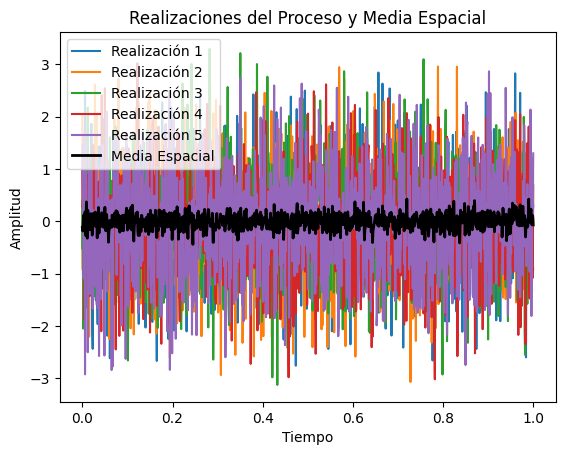

In [ ]:
def grafica_realizaciones(t, X, num_realizaciones=5): # Grafica un conjunto de realizaciones del proceso y la media espacial.

    ensemble_average = np.mean(X, axis=0)

    plt.figure()
    for i in range(num_realizaciones): #se itera en el num_realizaciones para poder graficarlas
        plt.plot(t, X[i, :], label=f'Realización {i+1}') #grafica de la matriz X, i realización/fila, todas las columnas.
    plt.plot(t, ensemble_average, 'k', linewidth=2, label='Media Espacial')
    plt.title('Realizaciones del Proceso y Media Espacial')
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.show()

grafica_realizaciones(t, X, num_realizaciones=5)

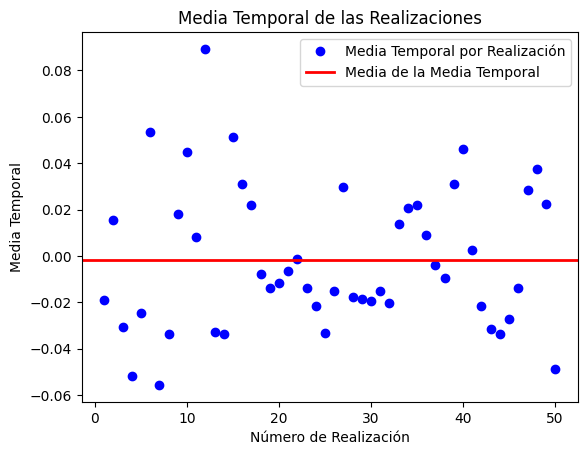

In [ ]:
def grafica_media_temporal(M): #Grafica la media temporal de cada realización y la media de las medias temporales.
    time_averages = prom_temp(N, M, mu, sigma)
    plt.figure()
    plt.plot(np.arange(1, M+1), time_averages, 'bo', label='Media Temporal por Realización')
    plt.axhline(np.mean(time_averages), color='r', linewidth=2, label='Media de la Media Temporal')
    plt.legend()
    plt.title('Media Temporal de las Realizaciones')
    plt.xlabel('Número de Realización')
    plt.ylabel('Media Temporal')
    plt.show()

grafica_media_temporal(M)

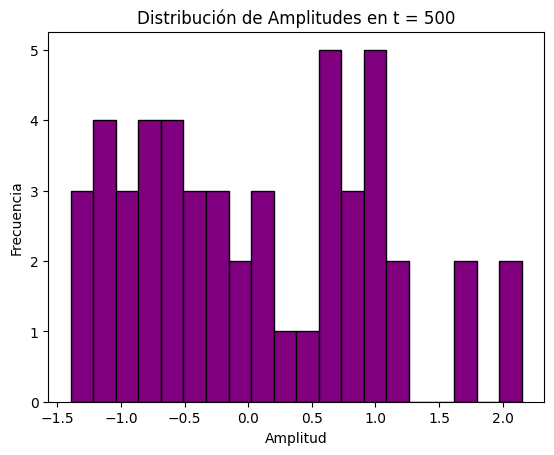

In [ ]:
def grafica_distribucion_amplitud(X, instante): #Grafica la distribución de amplitudes en un instante específico de tiempo.

    plt.figure()
    plt.hist(X[:, instante], bins=20, color='purple', edgecolor='black')
    plt.title(f'Distribución de Amplitudes en t = {instante}')
    plt.xlabel('Amplitud')
    plt.ylabel('Frecuencia')
    plt.show()


grafica_distribucion_amplitud(X, instante=int(N/2))

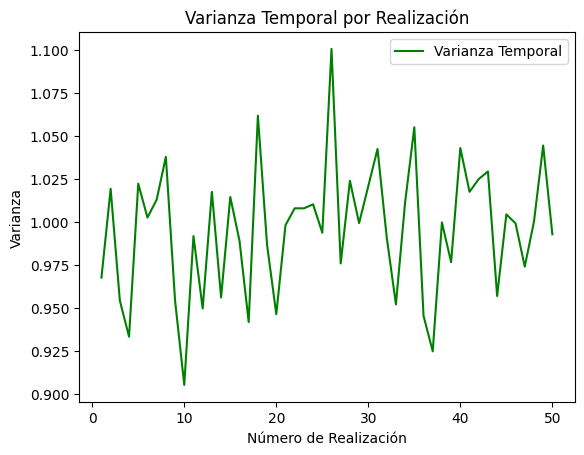

In [ ]:
def grafica_varianza_temporal(M, X): #Grafica la varianza temporal de cada realización.

    varianza_temporal = np.var(X, axis=1)

    plt.figure()
    plt.plot(np.arange(1, M+1), varianza_temporal, 'g-', label='Varianza Temporal')
    plt.xlabel('Número de Realización')
    plt.ylabel('Varianza')
    plt.title('Varianza Temporal por Realización')
    plt.legend()
    plt.show()
grafica_varianza_temporal(M, X)

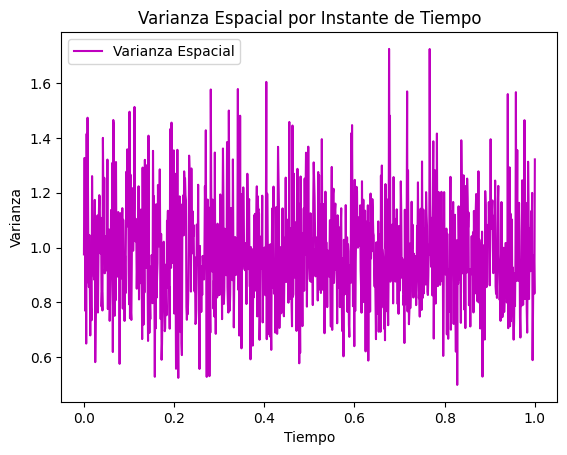

In [ ]:
def grafica_varianza_espacial(t, X): #Grafica la varianza espacial en cada instante de tiempo.

    varianza_espacial = np.var(X, axis=0)

    plt.figure()
    plt.plot(t, varianza_espacial, 'm-', label='Varianza Espacial')
    plt.xlabel('Tiempo')
    plt.ylabel('Varianza')
    plt.title('Varianza Espacial por Instante de Tiempo')
    plt.legend()
    plt.show()


grafica_varianza_espacial(t, X)

# **PARÁMETROS ADICIONALES A ANALIZAR:**
1. Densidad espectral de potencia (PSD)
2. Función de densidad de probabilidad (PDF)


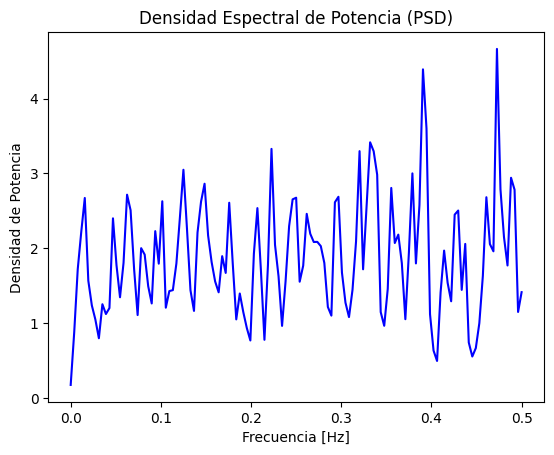

In [ ]:
def grafica_psd(X, fs=1.0, nperseg=256): #Calcula y grafica la Densidad Espectral de Potencia (PSD) usando el método de Welch.
        #fs (float): Frecuencia de muestreo.
        #nperseg (int): Número de muestras por segmento para el cálculo de PSD.

    realizacion = X[0, :]  #Primera realización
    freqs, psd = welch(realizacion, fs=fs, nperseg=nperseg)

    '''método welch, ¿cómo se aplicó acá?
    1. La señal se divide en varios segmentos que pueden solaparse para reducir el error de varianza en la estimación. Cada segmento contiene una cierta cantidad de puntos de datos (controlada por el parámetro nperseg).
    2. Luego se le realiza la FFT para convertir los datos al dominio de la frecuencia.
    3. Se calcula la PSD de cada segmento a partir del cuadrado de la magnitud de su FFT. Para la estimación de la potencia.

    '''

    plt.figure()
    plt.plot(freqs, psd, color='blue', label='PSD')
    plt.title('Densidad Espectral de Potencia (PSD)')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Densidad de Potencia')
    plt.show()

grafica_psd(X, fs=1.0)


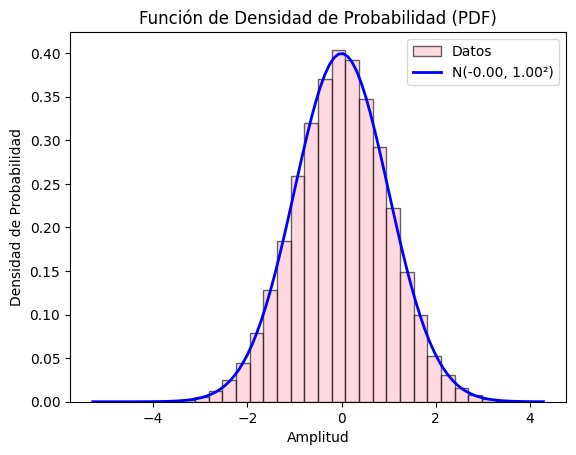

In [ ]:
def grafica_pdf(X, bins=30): #Grafica la Función de Densidad de Probabilidad (PDF) de las amplitudes de todas las realizaciones.

    # Aplanamos X para tomar todas las amplitudes como una sola muestra grande
    amplitudes = X.flatten()

    plt.figure()
    # Histograma de las amplitudes
    plt.hist(amplitudes, bins=bins, density=True, color='pink', edgecolor='black', alpha=0.6, label='Datos')

    # Ajuste de una PDF normal a los datos, aunque los nuestros ya están de esta forma, pero igual.
    mu, sigma = np.mean(amplitudes), np.std(amplitudes)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sigma)

    plt.plot(x, p, 'b', linewidth=2, label=f'N({mu:.2f}, {sigma:.2f}²)')
    plt.title('Función de Densidad de Probabilidad (PDF)')
    plt.xlabel('Amplitud')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend()
    plt.show()

grafica_pdf(X, bins=30)

# **Implementación de ejemplos en comunicaciones**

Aplicación encontrada: Comunicación en Redes de celular, enfocada en el desvanecimiento.

 Los dispositivos móviles se comunican con torres de telecomunicación mientras están en movimiento, por ejemplo, cuando se viaja en un automóvil. La señal que llega al receptor (el teléfono) experimenta fenómenos de desvanecimiento (fading), debido a obstáculos en el entorno como edificios, árboles o colinas, que causan múltiples caminos de señal, algunos de los cuales interfieren entre sí.
 Así que, para comprobar si es un proceso ergódico, se analizará la varianza y la media en base a esta información:
 1. En un entorno urbano o suburbano, la media de la potencia de la señal en dBm se encuentra entre -70 dBm y -90 dBm.
 2. En un entorno urbano, la desviación estándar de la señal recibida suele estar entre 5 y 12 dB.


In [ ]:
#Ejemplo de desvanecimiento rápido en zona urbana.
mu = -80 #en dB
sigma = 10 #en dB

N = 1000
M = 100
t = np.linspace(0, 1, N)
X = sigma * np.random.randn(M, N) + mu


Promedio Temporal Promedio: -79.9842
Promedio Espacial Promedio: -79.9842
¿El proceso es ergódico? True


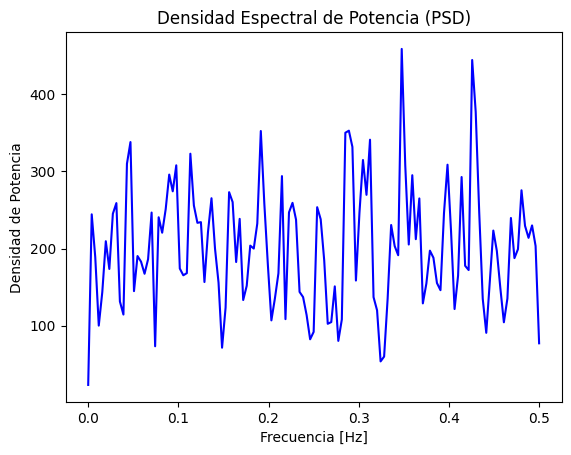

In [ ]:
print("¿El proceso es ergódico?", comprobacion_erg(N, M, mu, sigma))
grafica_psd(X, fs=1.0)

In [ ]:
#Ejemplo de desvanecimiento lento en zona rural.
mu = -75 #en dB
sigma = 1 #en dB

N = 1000
M = 5
t = np.linspace(0, 1, N)
X = sigma * np.random.randn(M, N) + mu

Promedio Temporal Promedio: -75.0037
Promedio Espacial Promedio: -75.0037
¿El proceso es ergódico? True


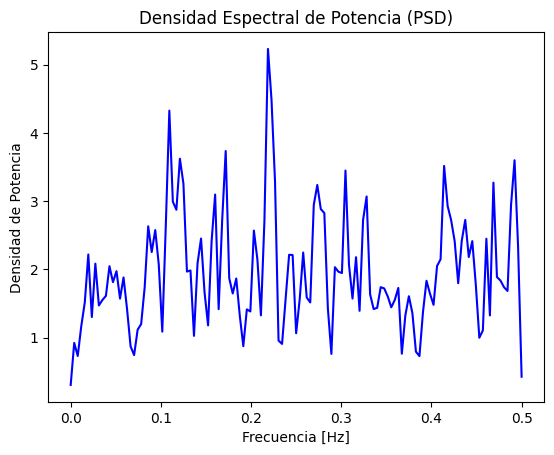

In [ ]:
print("¿El proceso es ergódico?", comprobacion_erg(N, M, mu, sigma))
grafica_psd(X, fs=1.0)